# Data Curation & Management – Final Exam
**Semester:** Spring 2025  **Generated:** 2025‑04‑23 17:22

**Student name:** Abhiram Singireddy

Complete each question in the order given. **Do not delete** any rubric headers marked with 💯 — they are used for grading.
Place any additional code or markdown cells *below* the relevant header.

### Final Project Requirements:
1. The code must run - if any part of the code throws an error, the final will receive a zero grade
2. The code must run in order.  At no time will the kernal need to be restarted or will the grader be required to "go backwards to go forwards".
    3. The grader will select Kernel>Restart Kernel and run all cells.  There should be no reason for that to cause an error
    4. Exception: The grader will have to adjust for the reference to the Kagglehub file only
3. Quality of work is paramount.  Simple results and basic findings will not receive an A.  In other words, the more inspection of the data, the better the grade.


# Final Project Data Selection:

You are now tasked with taking all that you have learned and applying it to a dataset.  For your final project, you will take on the role of a data analyst.  You are tasked with providing data insights and findings based on one of the four data sets found from Kagglehub.

*Note: You can only use one of these four datasets:*

* <a href='https://www.kaggle.com/datasets/bhargavchirumamilla/netflix-movies-and-tv-shows-till-2025'>Netflix Movies & TV Shows (till 2025) </a>
* <a href='https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset'>Global Superstore</a>
* <a href='https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024'>World Happiness Report 2024</a>
* <a href='https://www.kaggle.com/datasets/gitadityamaddali/flipkart-laptop-reviews'>Flipkart/Laptop Reviews (sentiment)</a>

The final project is not just about good code.  Its about using your data analytical mindset to uncover and present findings.  Therefore, basic descriptive statistics and simple aggregations will not suffice.  You are expected to inspect the data, ask probing questions of it, and then present the results, both visually and in a table-based output.

# Q0 Imports

Imports are started here.  If you are using other imports, make sure to include them in the code block below.

In [61]:
# Core data wrangling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text / sentiment analysis (if the dataset has free-text fields)
from textblob import TextBlob

# SQLite persistence
import sqlite3
from sqlalchemy import create_engine, text

# Dataset download via KaggleHub
import kagglehub

# File-system convenience (optional but handy)
from pathlib import Path


## Q1  Dataset selection 💯 (10 pts)

Write 5–8 sentences addressing:
1. Dataset name & Kaggle URL
2. Three columns you anticipate using most
3. Why you have chosen this dataset?
5. Why this dataset can support ≥3 substantive findings

*The name of the dataset is "World Happiness Report 2024" and the Kaggle URL is https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2024. It includes data on how countries around the world rank in terms of happiness, and the factors that may be contributing to these scores. The three columns I anticiapte on using the most are Ladder score, Explained by: Log GDP per capita, and Explained by: Freedom to make life choices. I chose this dataset because I think it is interesting to examine how different factors such as economic production and life expectancy relate to happiness when looked at on a global scale. This datset can support at least 3 substantive findings because it includes both overall happiness scores and their associated factors. This allows me to explore correlations and patterns across different regions and see how different countries compare. 
*

## Q2  ETL pipeline 💯 (25 pts)

Follow the sub‑sections below. Each must run top‑to‑bottom on a fresh kernel. After `Kernel ▸ Restart & Run All` the notebook must complete without manual intervention (except editing the DATA_PATH cell above).


### 2a Extract

In [7]:
# Use kagglehub or manual download here

import kagglehub 
import pathlib 
import pandas as pd

path = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2024")

print("Path to dataset files:", path)

Path to dataset files: /Users/abhiramsingireddy/.cache/kagglehub/datasets/ajaypalsinghlo/world-happiness-report-2024/versions/1


In [62]:
world_happiness_report_dir = pathlib.Path(r"/Users/abhiramsingireddy/.cache/kagglehub/datasets/ajaypalsinghlo/world-happiness-report-2024/versions/1")
world_happiness_file = world_happiness_report_dir / "WHR2024.csv" 

world_happiness_df = pd.read_csv(world_happiness_file)

world_happiness_df

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.295,3.462,3.128,0.534,0.665,0.262,0.473,0.189,0.072,1.102
139,Sierra Leone,3.245,3.366,3.124,0.654,0.566,0.253,0.469,0.181,0.053,1.068
140,Lesotho,3.186,3.469,2.904,0.771,0.851,0.000,0.523,0.082,0.085,0.875
141,Lebanon,2.707,2.797,2.616,1.377,0.577,0.556,0.173,0.068,0.029,-0.073


### 2b Transform – cleaning & feature engineering

In [63]:
# Typical tasks: .dropna(), .astype(), explode(), new columns, aggregations

world_happiness_df.shape

(143, 11)

In [64]:
world_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                143 non-null    object 
 1   Ladder score                                143 non-null    float64
 2   upperwhisker                                143 non-null    float64
 3   lowerwhisker                                143 non-null    float64
 4   Explained by: Log GDP per capita            140 non-null    float64
 5   Explained by: Social support                140 non-null    float64
 6   Explained by: Healthy life expectancy       140 non-null    float64
 7   Explained by: Freedom to make life choices  140 non-null    float64
 8   Explained by: Generosity                    140 non-null    float64
 9   Explained by: Perceptions of corruption     140 non-null    float64
 10  Dystopia + res

In [65]:
world_happiness_df.describe(include='all')

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,143,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
unique,143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,NaN,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,NaN,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,NaN,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,NaN,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,NaN,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750


In [66]:
world_happiness_df_clean = world_happiness_df.dropna()

In [67]:
world_happiness_df_clean = world_happiness_df_clean.rename(columns={
    'Country name': 'country',
    'Ladder score': 'ladder_score',
    'upperwhisker': 'upper_whisker',
    'lowerwhisker': 'lower_whisker',
    'Explained by: Log GDP per capita': 'gdp',
    'Explained by: Social support': 'social_support',
    'Explained by: Healthy life expectancy': 'life_expectancy',
    'Explained by: Freedom to make life choices': 'freedom',
    'Explained by: Generosity': 'generosity',
    'Explained by: Perceptions of corruption': 'corruption',
    'Dystopia + residual': 'dystopia_residual'
})

In [68]:
world_happiness_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 142
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            140 non-null    object 
 1   ladder_score       140 non-null    float64
 2   upper_whisker      140 non-null    float64
 3   lower_whisker      140 non-null    float64
 4   gdp                140 non-null    float64
 5   social_support     140 non-null    float64
 6   life_expectancy    140 non-null    float64
 7   freedom            140 non-null    float64
 8   generosity         140 non-null    float64
 9   corruption         140 non-null    float64
 10  dystopia_residual  140 non-null    float64
dtypes: float64(10), object(1)
memory usage: 13.1+ KB


In [69]:
world_happiness_df_clean['positive_factors'] = (
    world_happiness_df_clean['gdp'] +
    world_happiness_df_clean['social_support'] +
    world_happiness_df_clean['life_expectancy'] +
    world_happiness_df_clean['freedom'] +
    world_happiness_df_clean['generosity']
)

### 2c Load – save to SQLite

In [70]:
import sqlite3
from sqlalchemy import create_engine

engine = create_engine('sqlite:///project.db')
# Save your DataFrame to the SQLite db, giving the table a meaningful name
world_happiness_df_clean.to_sql('world_happiness_2024', con=engine, if_exists='replace', index=False)

140

### Q2 Rubric – ETL Pipeline

| Sub-task | Criteria | Pts |
|----------|----------|-----|
| **2a & 2b  Cleaning & transformation** | Applies appropriate pandas cleaning techniques (`dropna`, `astype`, deduplication, etc.) | **10** |
| **2b  Feature engineering / aggregation** | Creates **≥ 1** new meaningful column *or* aggregated table (e.g., groupby summary) | **10** |
| **2c  Load to SQLite** | Writes the cleaned DataFrame(s) to `project.db` without errors (`to_sql`, correct schema) | **5** |
| **Section total** |   | **25 pts** |


## Q3  Analytical findings 💯 (30 pts)

In this section, you will reference the cleaned dataframe you created in step 2b.  

Each finding section will display:
1. What is the question you posed of the data.
2. A description of the code logic that was used to answer the question. This is a high-level overview (1-3 sentences) of the code's process.
3. The answer or findings to the question.  This is a descriptive answer, with numbers referenced if applicable.
    4. Note that the pandas code that produces the answer will reflect and support your findings/answer.
    5. Each Finding block must finish with one pandas DataFrame showing the key numbers that appear in your narrative.

### Finding 1
**Question:** Which country reported the highest life satisfaction (ladder score) in 2024?
**Method:** *(I sorted the cleaned data frame by the 'Ladder score' column in descending order and selected the top country.)*  
**Answer:** Finland reported the highest life satisfaction in 2024, with a ladder score of 7.741.

_Write your narrative above, then run the code cell below to compute it._

In [71]:
# pandas code producing the answer

top_country = world_happiness_df_clean.sort_values(by='ladder_score', ascending=False).head(1)
top_country[['country', 'ladder_score']]

,country,ladder_score
0,Finland,7.741


### Finding 2
**Question:** Which factor contributes the most to the average happiness score across all countries?

**Method:** *(I calculated the average of each contributing factor column using '.mean()', sorted the results in descending order, and used '.head(1)' find the highest contributor.)*  

**Answer:** Across all countries, GDP had the highest average contribution to the happiness score, with an average impact of 1.38. 

_Write your narrative above, then run the code cell below to compute it._

In [72]:
# pandas code producing the answer

positive_factors = ['gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity']
avg_contributions = world_happiness_df_clean[positive_factors].mean().sort_values(ascending=False).round(2)
avg_contributions.head(1)

gdp    1.38
dtype: float64

### Finding 3
**Question:** How many countries have a happiness score above the global average?
**Method:** *(I calculated the global average of the 'ladder_score' and filtered the DataFrame to count how many countries have a score higher than that value.)*  
**Answer:** A total of 79 countries scored have a happiness score above the global average of 5.53.

_Write your narrative above, then run the code cell below to compute it._

In [73]:
# pandas code producing the answer

global_avg = world_happiness_df_clean['ladder_score'].mean().round(2)
above_avg_countries = world_happiness_df_clean[world_happiness_df_clean['ladder_score'] > global_avg]
pd.DataFrame({'Countries above global average': [above_avg_countries.shape[0]], 'Global average score': [global_avg]})

,Countries above global average,Global average score
0,79,5.53


#### Q3 Rubric

| Component | Criteria | Points per finding |
|-----------|----------|--------------------|
| **Narrative clarity** | • States a **specific** question or hypothesis<br>• Summarises the answer in plain English<br>• ≤ 120 words, grammatically sound | **3 pts** |
| **Code correctness & reproducibility** | • Uses pandas and/or SQL to produce the stated result<br>• Runs without errors after **Kernel ▸ Restart & Run All**<br>• Shows only essential steps (no orphan vars) | **4 pts** |
| **Tabular evidence** | • Displays a concise DataFrame (≤ 10 rows × 5 cols) **or** a scalar value matching the narrative<br>• Columns clearly named; units (if any) included | **3 pts** |

**Total per finding:** **10 pts**  
Three findings × 10 pts = **30 pts**


## Q4  Visual communication 💯 (20 pts)

**Generate one chart per finding below.**

This can be either:
* Visual representations of the findings in the last section
* Visuals of the data that helped you in determining the direction you chose to go with the data

Remember: Basic statistical visualizations may not suffice, especially if the statistics have no bearing on your findings.

**Requirements for all visualizations:**
1. Title & axes labels are mandatory —every chart must call plt.title() and label both axes (or legend if an axis is categorical).
2. One chart per code cell —no sub-plots or multiple figures in the same cell.
3. Chart type must fit the data —pick an appropriate visual (bar for categories, line for trends, scatter for correlation, etc.).
4. Legible & uncluttered —limit categories/points so labels don’t overlap; use consistent font sizes and plt.tight_layout() when needed.
5. Consistent styling —use a coherent colour palette across all three charts and include a legend when more than one series appears.

### Chart for Finding 1

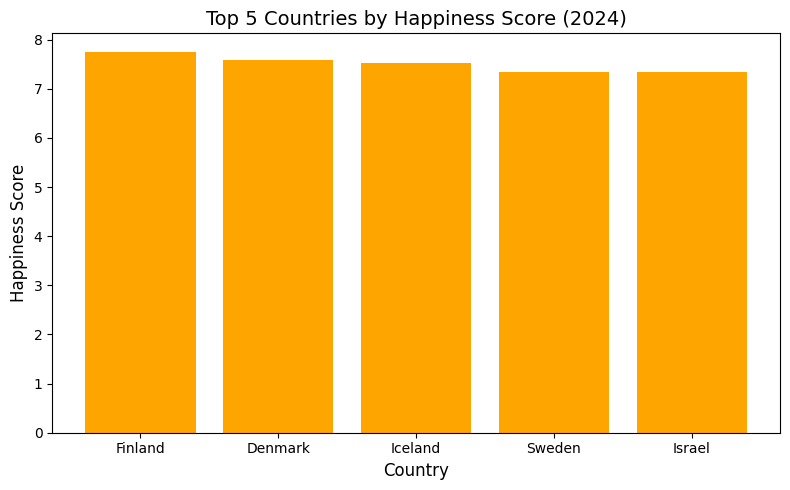

In [74]:
# e.g. df.plot(kind='bar'); plt.title('...')

# Chart for Finding 1: Finland's ladder score vs top 5 countries in 2024
import matplotlib.pyplot as plt

top5 = world_happiness_df_clean.sort_values(by='ladder_score', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.bar(top5['country'], top5['ladder_score'], color='orange')

plt.title('Top 5 Countries by Happiness Score (2024)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.tight_layout()
plt.show()

### Chart for Finding 2

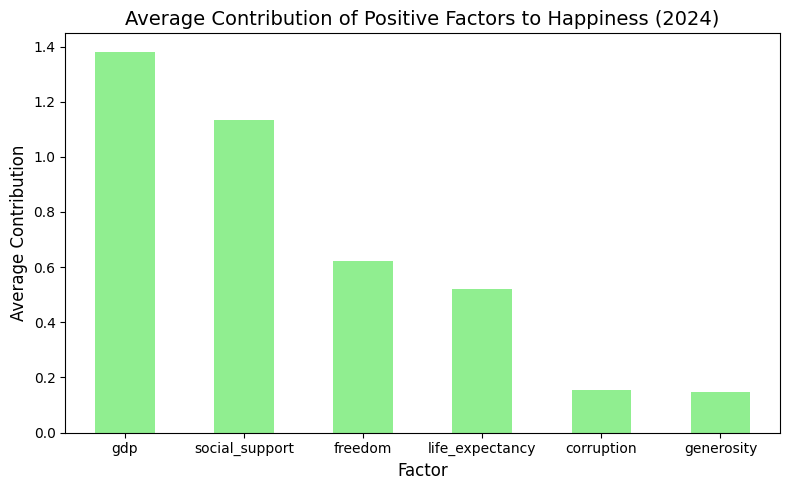

In [75]:
# e.g. df.plot(kind='bar'); plt.title('...')
import matplotlib.pyplot as plt

# Chart for Finding 2: Average contribution of each positive factor to happiness
positive_factors = ['gdp', 'social_support', 'life_expectancy', 'freedom', 'generosity', 'corruption']
avg_contributions = world_happiness_df_clean[positive_factors].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
avg_contributions.plot(kind='bar', color='lightgreen')

plt.title('Average Contribution of Positive Factors to Happiness (2024)', fontsize=14)
plt.xlabel('Factor', fontsize=12)
plt.ylabel('Average Contribution', fontsize=12)
plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

### Chart for Finding 3

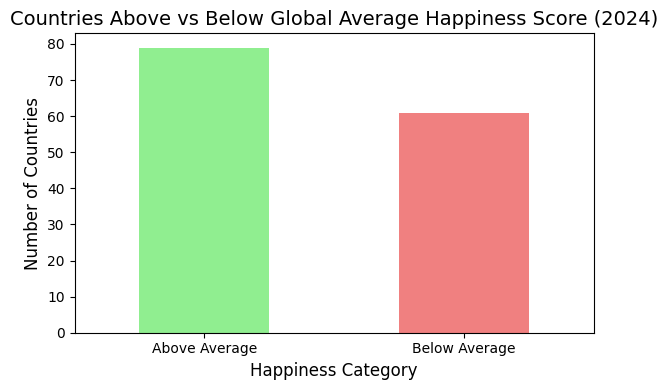

In [76]:
# e.g. df.plot(kind='bar'); plt.title('...')
import matplotlib.pyplot as plt

# Chart for Finding 3: Distribution of countries above vs below global average happiness

global_avg = world_happiness_df_clean['ladder_score'].mean()
above_avg = (world_happiness_df_clean['ladder_score'] > global_avg).sum()
below_avg = (world_happiness_df_clean['ladder_score'] <= global_avg).sum()

# Prepare the data
counts = pd.Series({'Above Average': above_avg, 'Below Average': below_avg})

plt.figure(figsize=(6, 4))
counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])

plt.title('Countries Above vs Below Global Average Happiness Score (2024)', fontsize=14)
plt.xlabel('Happiness Category', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Q4  Rubric – Visual Communication

The section requires **three** separate charts (one per finding).  
Each chart is worth **6 pts**, and 2 pts are reserved for code hygiene.

| For **each** chart | What we’re looking for | Pts |
|--------------------|-----------------------|-----|
| **Technical correctness** | Chart executes without error; chosen type matches the data | **2** |
| **Annotation quality** | Descriptive title **and** properly labelled axes (legend if needed) | **2** |
| **Clarity & alignment** | Readable layout (no label overlap, sensible scales) **and** the graphic clearly supports its finding | **2** |
| **Subtotal per chart** |   | **6 pts** |

**3 charts × 6 pts = 18 pts**

| Overall notebook | Criteria | Pts |
|------------------|----------|-----|
| **Code hygiene** | One chart per cell, consistent styling, tidy comments | **2 pts** |

| **Section total** |   | **20 pts** |



## Q5  Reproducibility & reflection 💯 (15 pts)

### 5a Sample SQL

Using SQL only, a technique to get a sample of the data.  This can be done any way you want.

You must describe what the SQL is doing and why that SQL logic is returning a sample (subset) of the data.

### 5 a  Sample SQL (basic proficiency)

Write **one** `SELECT` statement against the `project.db` SQLite file you created.  your SQL statement will return a smaller dataset. This can be done by using one of three options:  

* filter rows with a `WHERE` clause  
* limit the output with `LIMIT n`  
* perform a simple aggregation with `GROUP BY` (e.g., `COUNT(*)`, `AVG()`, or `SUM()`)

The query should reproduce—or directly support—**any numeric result** you cited in Findings 1-3.

1. Paste the SQL in a code block below, assigning it to a variable.
2. Reference that SQL in your read_sql statement.



In [77]:
# sql string goes here
sql_sample = """
SELECT country, ladder_score
FROM world_happiness_2024
ORDER BY ladder_score DESC
LIMIT 1;
"""

In [78]:
import pandas as pd, sqlite3
con = sqlite3.connect('project.db')
# sample_df = pd.read_sql(sql string from prior code block, con)

sample_df = pd.read_sql(sql_sample, con)
sample_df

,country,ladder_score
0,Finland,7.741


*(This SQL query directly supports Finding 1, which identified the top-ranking country by happiness score. It retrives the country with the highest happiness score 'ladder_score', by sorting all entires in descending order and limit the result to just the top one using 'LIMIT 1'.)*

### 5b Limitations / next steps

_In 2–3 sentences, discuss data limitations, assumptions, and future work._

A limitation of this dataset is that it only includes happiness data for 2024, so I can’t track changes or trends over time. This analysis assumes that happiness scores and their contributing factors are measured consistently across countries. Future work could involve comparing changes across multiple years to identify trends.

### Q5 Rubric – SQL & Reflection

| Sub-task | Criteria | Pts |
|----------|----------|-----|
| **5 a  SQL query & result** | Query executes without error on `project.db` | **3** |
| | Uses **at least one** of: `WHERE`, `LIMIT`, `GROUP BY` + aggregate | **4** |
| | Result reproduced in a DataFrame | **3** |
| **Subtotal 5 a** |   | **10** |
| **5 b  Limitations & next steps** | Identifies ≥ 2 data limitations **and** ≥ 1 future improvement | **3** |
| | Clear, concise writing (≤ 150 words; no jargon) | **2** |
| **Subtotal 5 b** |   | **5** |
| **Section total** |   | **15 pts** |
